# IMPORT THE NECCESSARY LIABRARIES

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
import numpy as np
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('indian_food.csv')
df.head()

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [4]:
df.describe().astype(int)

prep_time  cook_time
count        255        255
mean          31         34
std           72         48
min           -1         -1
25%           10         20
50%           10         30
75%           20         40
max          500        720

# 1. Distribution Analysis

## Preparation Time Analysis

### Histogram for Preparation Time

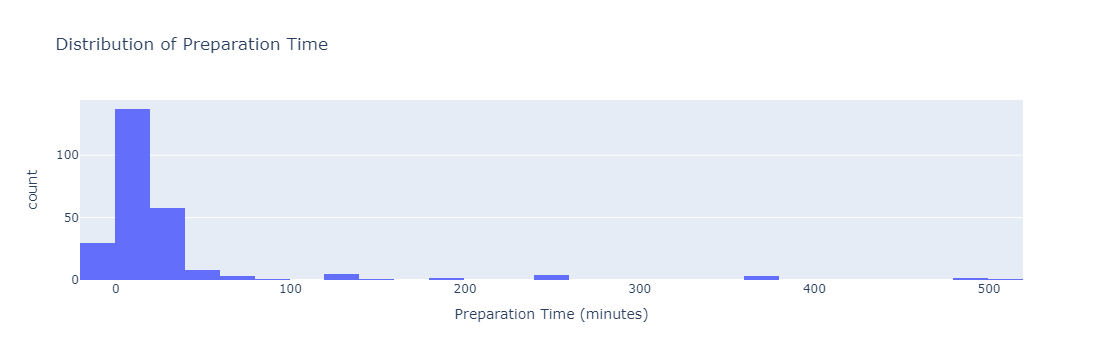

In [5]:

fig_prep_hist = px.histogram(df, x='prep_time', title='Distribution of Preparation Time',
                             labels={'prep_time': 'Preparation Time (minutes)'})
fig_prep_hist.show()

### Box Plot for Preparation Time

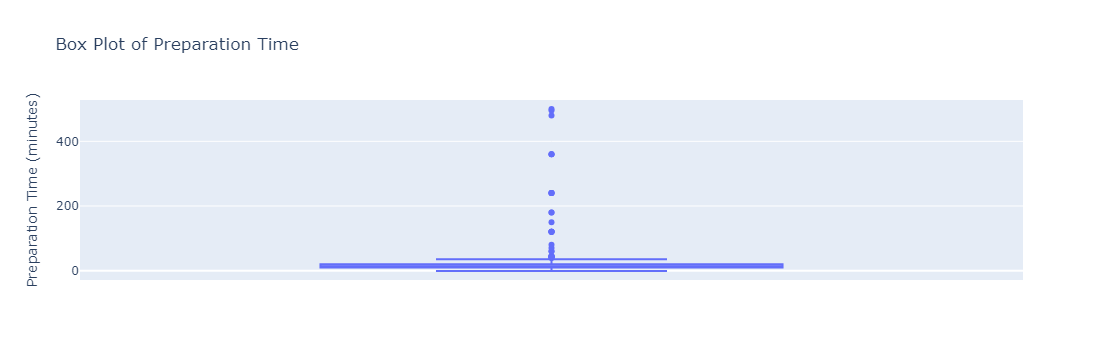

In [6]:
# Box plot for preparation time
fig_prep_box = px.box(df, y='prep_time', title='Box Plot of Preparation Time',
                      labels={'prep_time': 'Preparation Time (minutes)'})
fig_prep_box.show()


## Cooking Time Analysis

### Histogram for Cooking Time

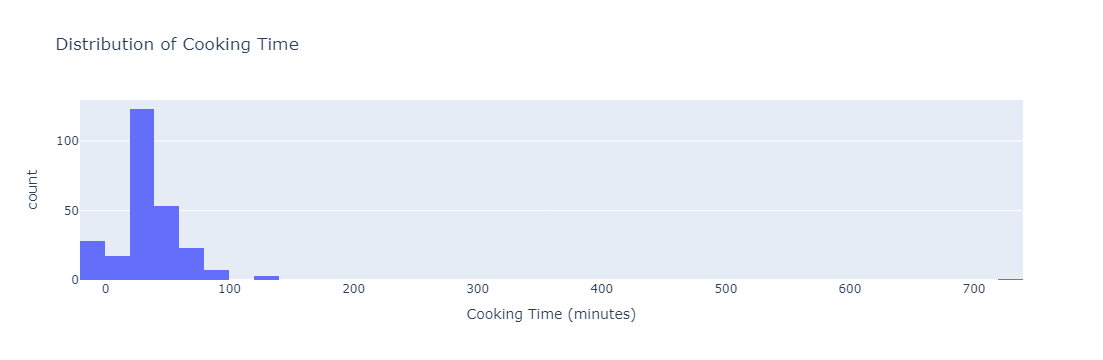

In [7]:
# Histogram for cooking time
fig_cook_hist = px.histogram(df, x='cook_time', title='Distribution of Cooking Time',
                             labels={'cook_time': 'Cooking Time (minutes)'})
fig_cook_hist.show()


### Box Plot for Cooking Time

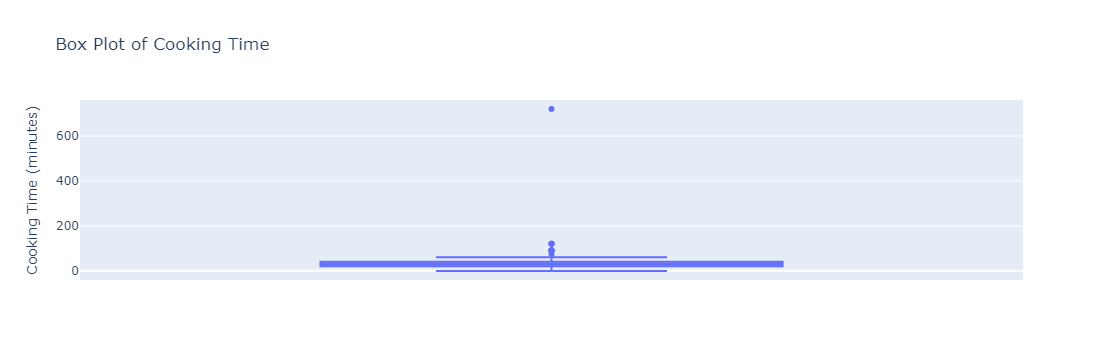

In [8]:
# Box plot for cooking time
fig_cook_box = px.box(df, y='cook_time', title='Box Plot of Cooking Time',
                      labels={'cook_time': 'Cooking Time (minutes)'})
fig_cook_box.show()


# 2. Categorical Analysis

## Diet: Count the Number of Vegetarian vs. Non-Vegetarian Dishes

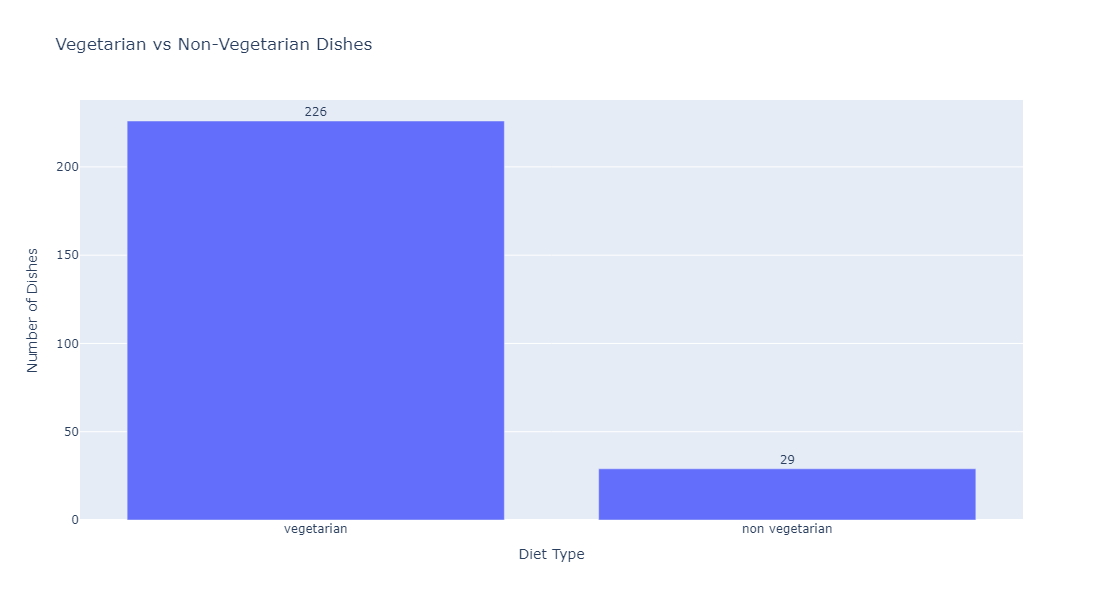

In [9]:

# Count the number of vegetarian vs. non-vegetarian dishes
diet_count = df['diet'].value_counts().reset_index()
diet_count.columns = ['diet', 'count']

# Bar plot for diet distribution
fig_diet = px.bar(diet_count, x='diet', y='count', title='Vegetarian vs Non-Vegetarian Dishes',
                  labels={'diet': 'Diet Type', 'count': 'Number of Dishes'}, text='count')
fig_diet.update_traces(texttemplate='%{text}', textposition='outside')
fig_diet.update_layout(width=1000, height=600)
fig_diet.show()

## Flavor Profile: Analyze the Distribution of Different Flavor Profiles

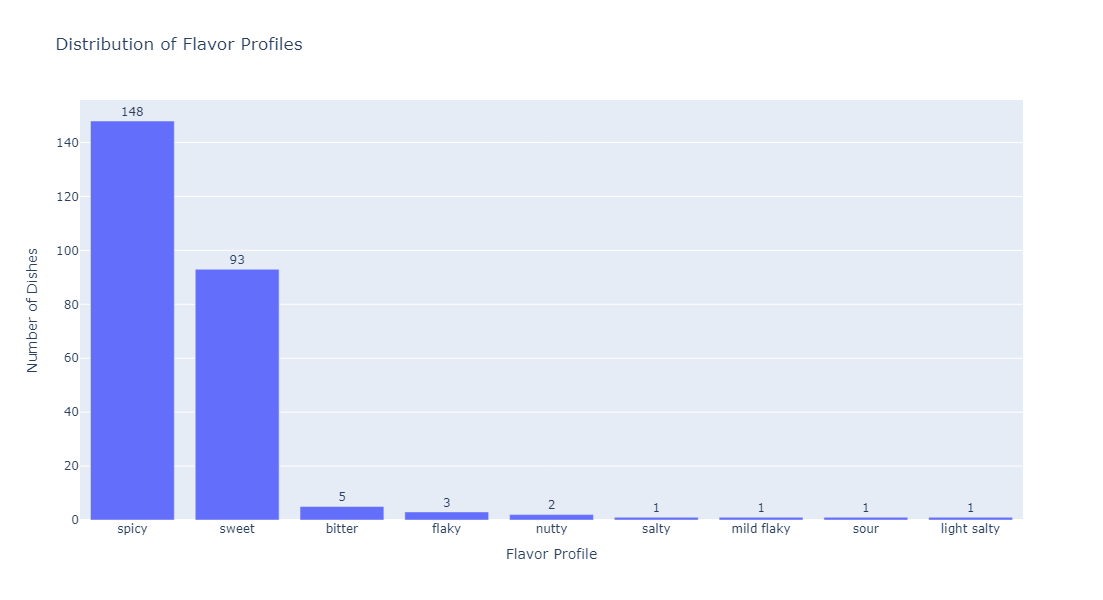

In [10]:
# Count the number of dishes for each flavor profile
flavor_count = df['flavor_profile'].value_counts().reset_index()
flavor_count.columns = ['flavor_profile', 'count']

# Bar plot for flavor profile distribution
fig_flavor = px.bar(flavor_count, x='flavor_profile', y='count', title='Distribution of Flavor Profiles',
                    labels={'flavor_profile': 'Flavor Profile', 'count': 'Number of Dishes'}, text='count')
fig_flavor.update_traces(texttemplate='%{text}', textposition='outside')
fig_flavor.update_layout(width=1000, height=600)
fig_flavor.show()


## Course: Determine the Distribution of Dishes Across Different Courses

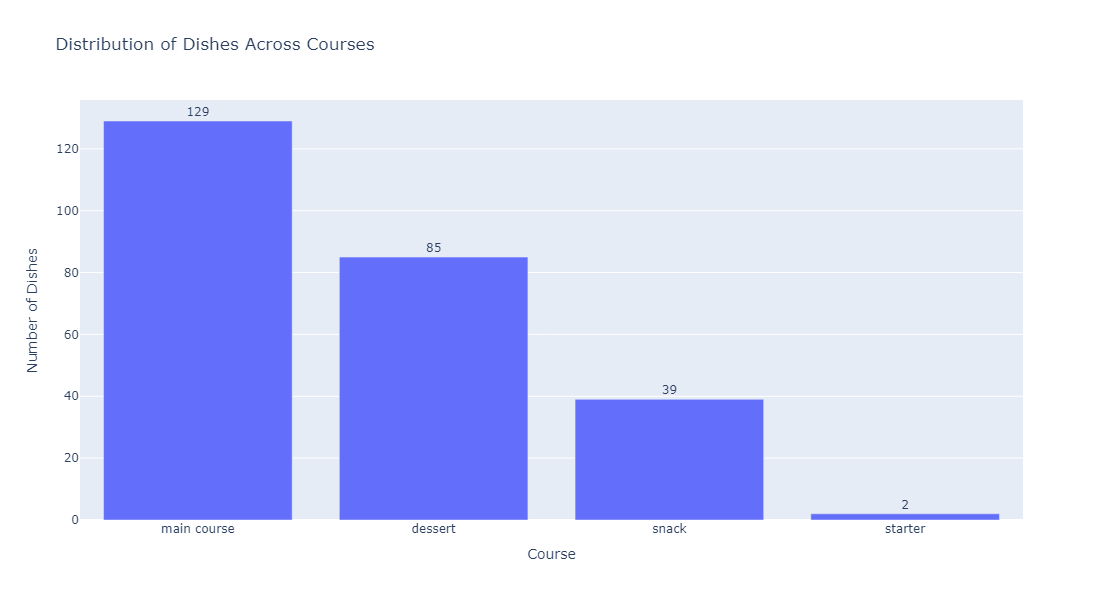

In [11]:
# Count the number of dishes for each course
course_count = df['course'].value_counts().reset_index()
course_count.columns = ['course', 'count']

# Bar plot for course distribution
fig_course = px.bar(course_count, x='course', y='count', title='Distribution of Dishes Across Courses',
                    labels={'course': 'Course', 'count': 'Number of Dishes'}, text='count')
fig_course.update_traces(texttemplate='%{text}', textposition='outside')
fig_course.update_layout(width=1000, height=600)
fig_course.show()


## State and Region: Count the Number of Dishes from Each State and Region

### State Analysis

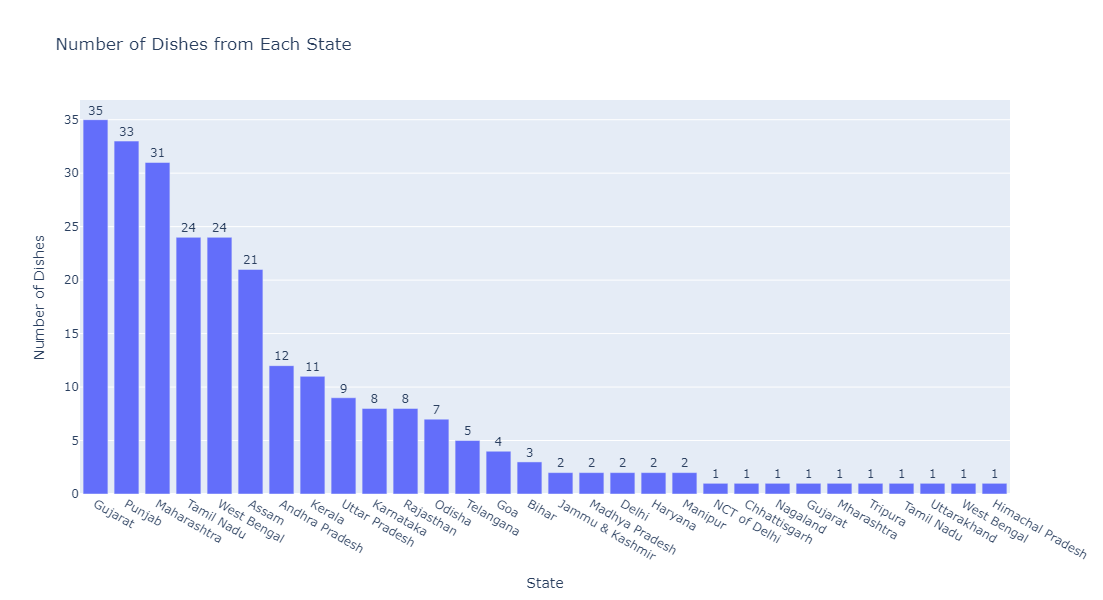

In [12]:
# Count the number of dishes from each state
state_count = df['state'].value_counts().reset_index()
state_count.columns = ['state', 'count']

# Bar plot for state distribution
fig_state = px.bar(state_count, x='state', y='count', title='Number of Dishes from Each State',
                   labels={'state': 'State', 'count': 'Number of Dishes'}, text='count')
fig_state.update_traces(texttemplate='%{text}', textposition='outside')
fig_state.update_layout(width=1000, height=600)
fig_state.show()


### Region Analysis

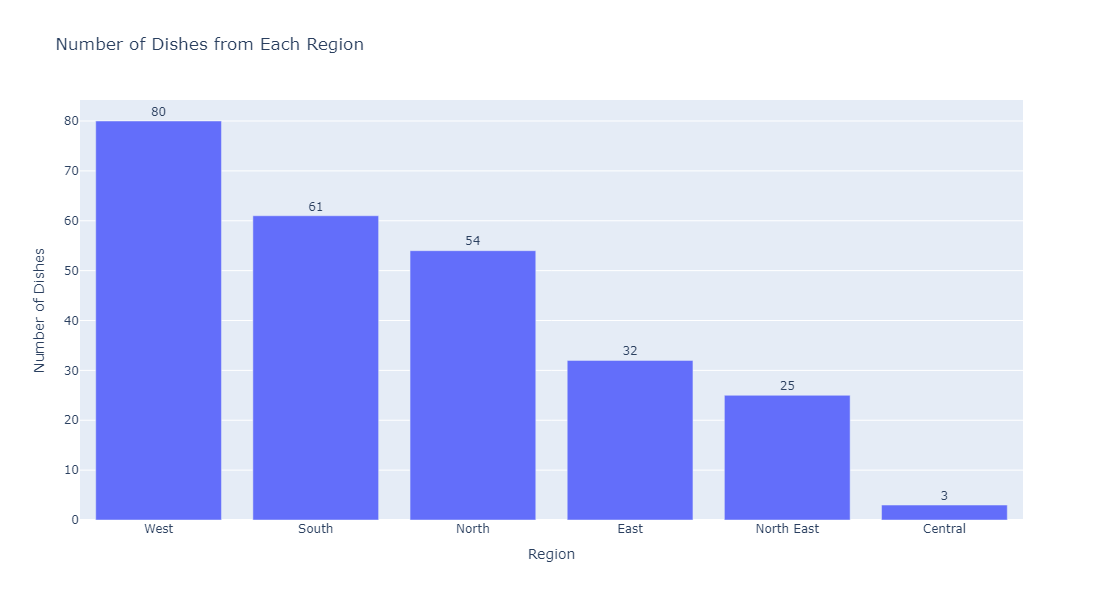

In [13]:
# Count the number of dishes from each region
region_count = df['region'].value_counts().reset_index()
region_count.columns = ['region', 'count']

# Bar plot for region distribution
fig_region = px.bar(region_count, x='region', y='count', title='Number of Dishes from Each Region',
                    labels={'region': 'Region', 'count': 'Number of Dishes'}, text='count')
fig_region.update_traces(texttemplate='%{text}', textposition='outside')
fig_region.update_layout(width=1000, height=600)
fig_region.show()


# 3. Time Analysis

## Calculate and analyze the total time (prep_time + cook_time) required for each dish.

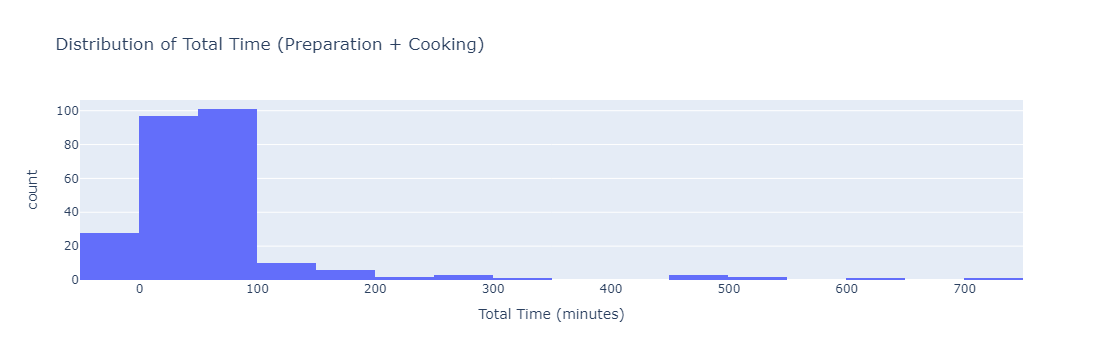

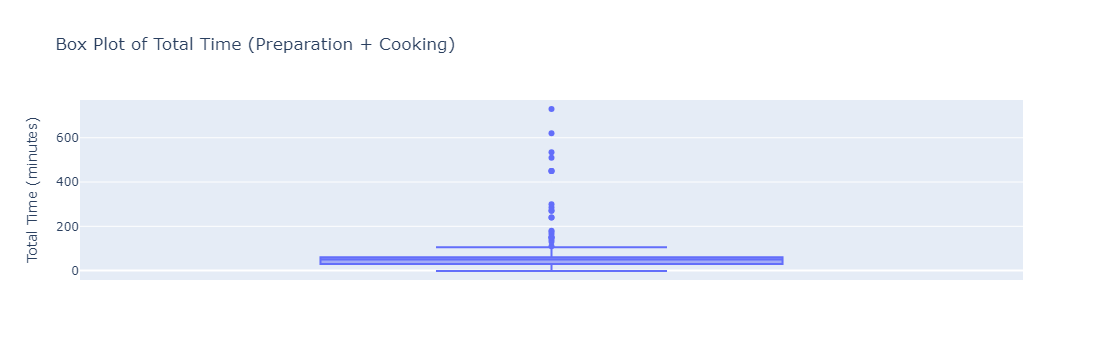

In [14]:
# Calculate total time
df['total_time'] = df['prep_time'] + df['cook_time']

# Histogram for total time
fig_total_time_hist = px.histogram(df, x='total_time', title='Distribution of Total Time (Preparation + Cooking)',
                                   labels={'total_time': 'Total Time (minutes)'})
fig_total_time_hist.show()

# Box plot for total time
fig_total_time_box = px.box(df, y='total_time', title='Box Plot of Total Time (Preparation + Cooking)',
                            labels={'total_time': 'Total Time (minutes)'})
fig_total_time_box.show()

# 4. Ingredient Analysis

## Ingredients Frequency Analysis

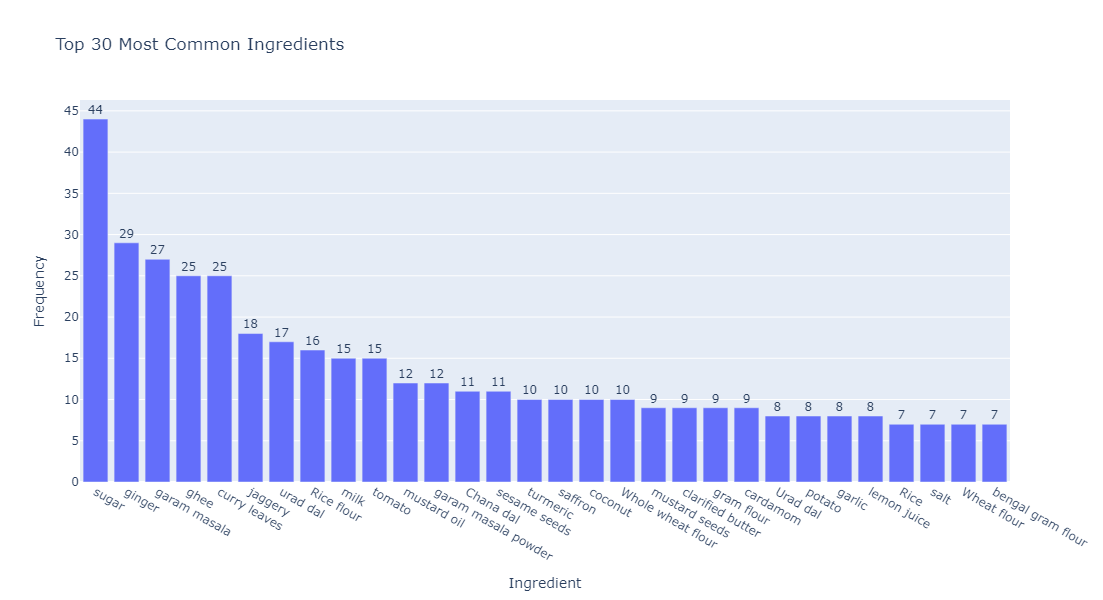

In [15]:
# Split the ingredients and count their frequencies
ingredients_list = df['ingredients'].str.split(', ').sum()
ingredients_count = Counter(ingredients_list)
ingredients_freq = pd.DataFrame(ingredients_count.items(), columns=['ingredient', 'frequency'])

# Sort by frequency
ingredients_freq = ingredients_freq.sort_values(by='frequency', ascending=False)

# Bar plot for ingredient frequency
fig_ingredients = px.bar(ingredients_freq.head(30), x='ingredient', y='frequency',
                         title='Top 30 Most Common Ingredients',
                         labels={'ingredient': 'Ingredient', 'frequency': 'Frequency'},
                         text='frequency')
fig_ingredients.update_traces(texttemplate='%{text}', textposition='outside')
fig_ingredients.update_layout(width=1000, height=600)
fig_ingredients.show()

## Ingredient Pairings Analysis

### Co-occurrence Matrix

In [16]:
# Create a list of all unique ingredients
unique_ingredients = list(set(ingredients_list))

# Initialize a co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=unique_ingredients, columns=unique_ingredients)

# Update the co-occurrence matrix
for ingredients in df['ingredients']:
    ingredients_split = ingredients.split(', ')
    for pair in combinations(ingredients_split, 2):
        co_occurrence_matrix.at[pair[0], pair[1]] += 1
        co_occurrence_matrix.at[pair[1], pair[0]] += 1

# Filter to the most common ingredients for better visualization
top_ingredients = ingredients_freq.head(20)['ingredient'].tolist()
co_occurrence_matrix_top = co_occurrence_matrix.loc[top_ingredients, top_ingredients]

### Heatmap for Ingredient Pairings

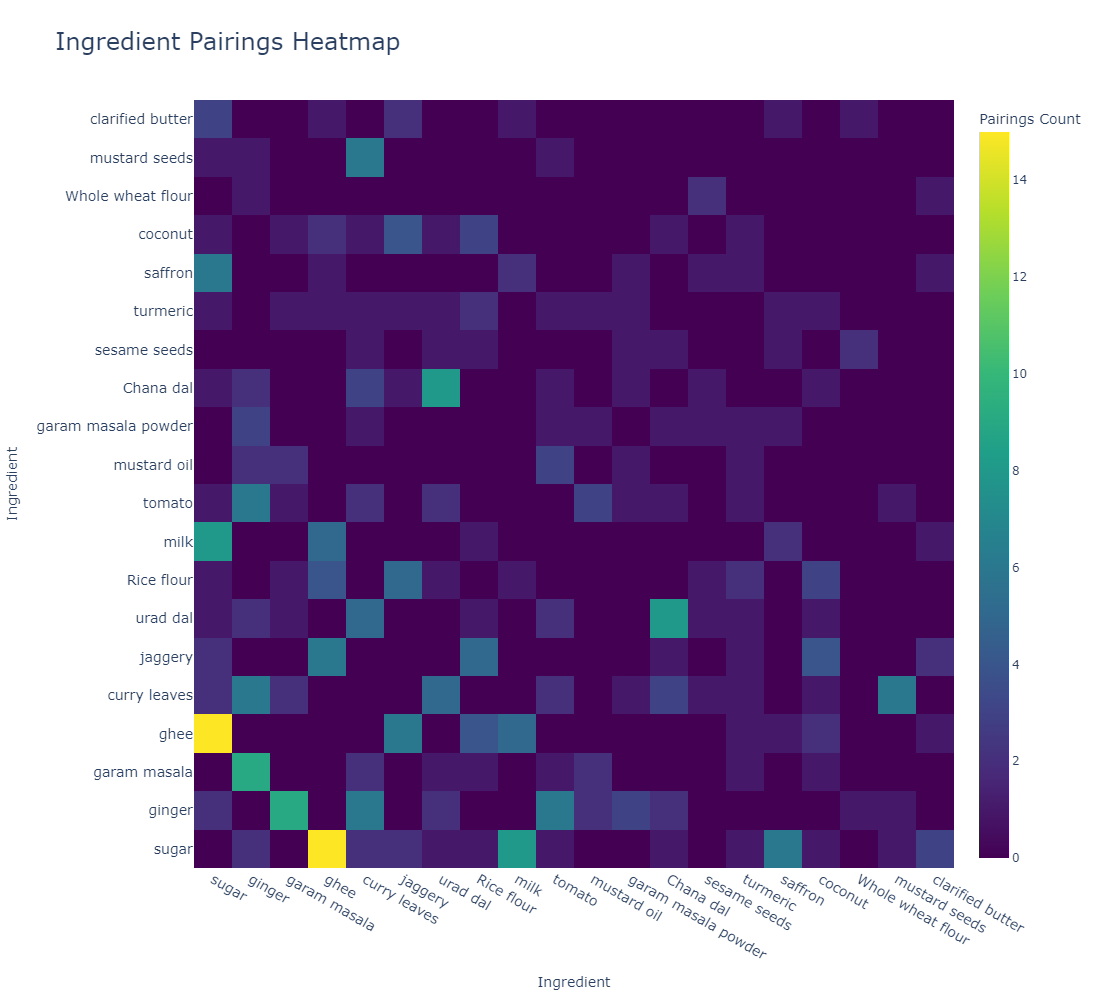

In [17]:
# Heatmap for ingredient pairings with larger layout
fig_pairings = go.Figure(data=go.Heatmap(
        z=co_occurrence_matrix_top.values,
        x=co_occurrence_matrix_top.columns,
        y=co_occurrence_matrix_top.index,
        colorscale='Viridis',
        colorbar=dict(title='Pairings Count')
    ))

fig_pairings.update_layout(
    title='Ingredient Pairings Heatmap',
    xaxis_title='Ingredient',
    yaxis_title='Ingredient',
    width=1000,  # Set the width of the figure
    height=1000,  # Set the height of the figure
    title_font_size=24,  # Increase the title font size
    xaxis=dict(tickfont=dict(size=14)),  # Increase x-axis tick font size
    yaxis=dict(tickfont=dict(size=14)),  # Increase y-axis tick font size
)

fig_pairings.show()


# 5. State and Regional Analysis

## Regional Specialties

## MOST COMMON INGREDIENTS IN EVERY REGION 

## NORTH

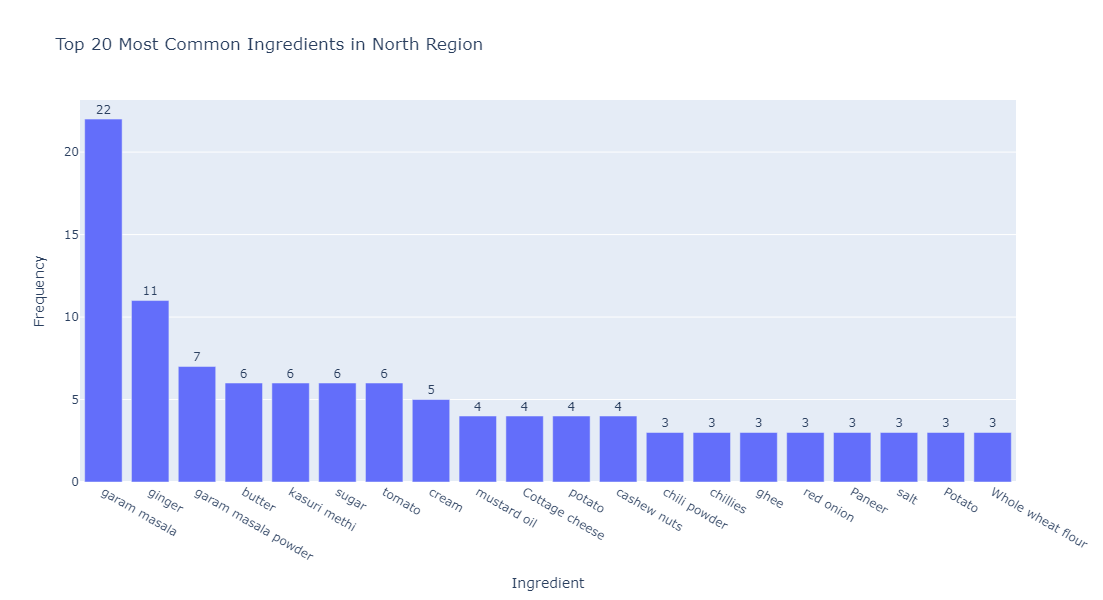

In [18]:

# Split the ingredients and count their frequencies for each region
def get_region_ingredients(region):
    region_df = df[df['region'] == region]
    ingredients_list = region_df['ingredients'].str.split(', ').sum()
    ingredients_count = Counter(ingredients_list)
    return pd.DataFrame(ingredients_count.items(), columns=['ingredient', 'frequency']).sort_values(by='frequency', ascending=False)

# Example: Analyze ingredients for the 'North' region
north_ingredients_freq = get_region_ingredients('North')

# Bar plot for ingredient frequency in the North region
fig_north_ingredients = px.bar(north_ingredients_freq.head(20), x='ingredient', y='frequency',
                               title='Top 20 Most Common Ingredients in North Region',
                               labels={'ingredient': 'Ingredient', 'frequency': 'Frequency'},
                               text='frequency')
fig_north_ingredients.update_traces(texttemplate='%{text}', textposition='outside')
fig_north_ingredients.update_layout(width=1000, height=600)
fig_north_ingredients.show()

## SOUTH

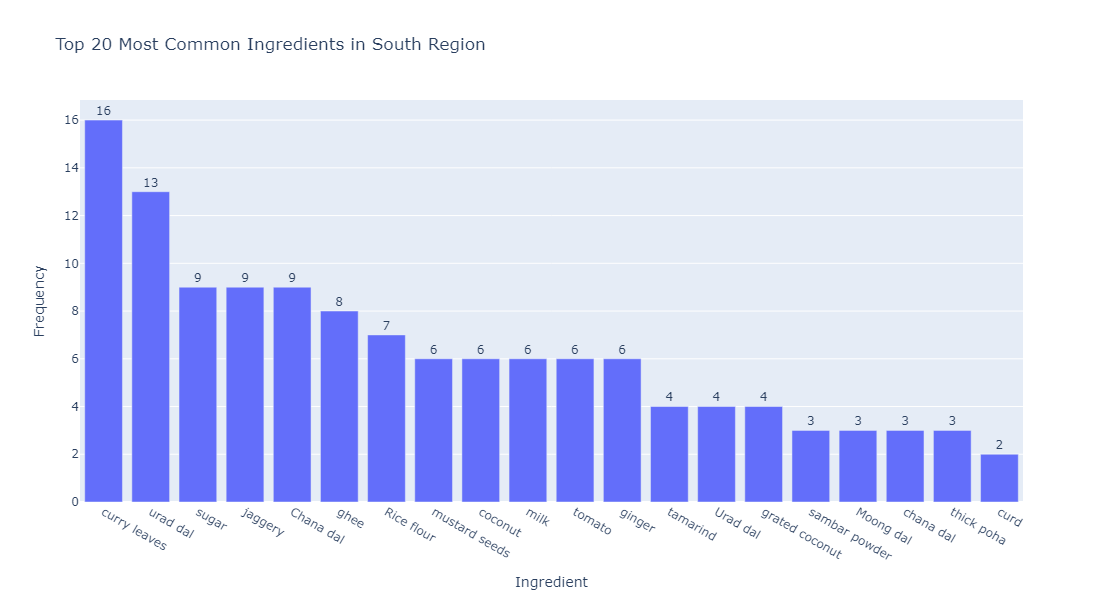

In [19]:
# Example: Analyze ingredients for the 'North' region
north_ingredients_freq = get_region_ingredients('South')

# Bar plot for ingredient frequency in the North region
fig_north_ingredients = px.bar(north_ingredients_freq.head(20), x='ingredient', y='frequency',
                               title='Top 20 Most Common Ingredients in South Region',
                               labels={'ingredient': 'Ingredient', 'frequency': 'Frequency'},
                               text='frequency')
fig_north_ingredients.update_traces(texttemplate='%{text}', textposition='outside')
fig_north_ingredients.update_layout(width=1000, height=600)
fig_north_ingredients.show()

## EAST

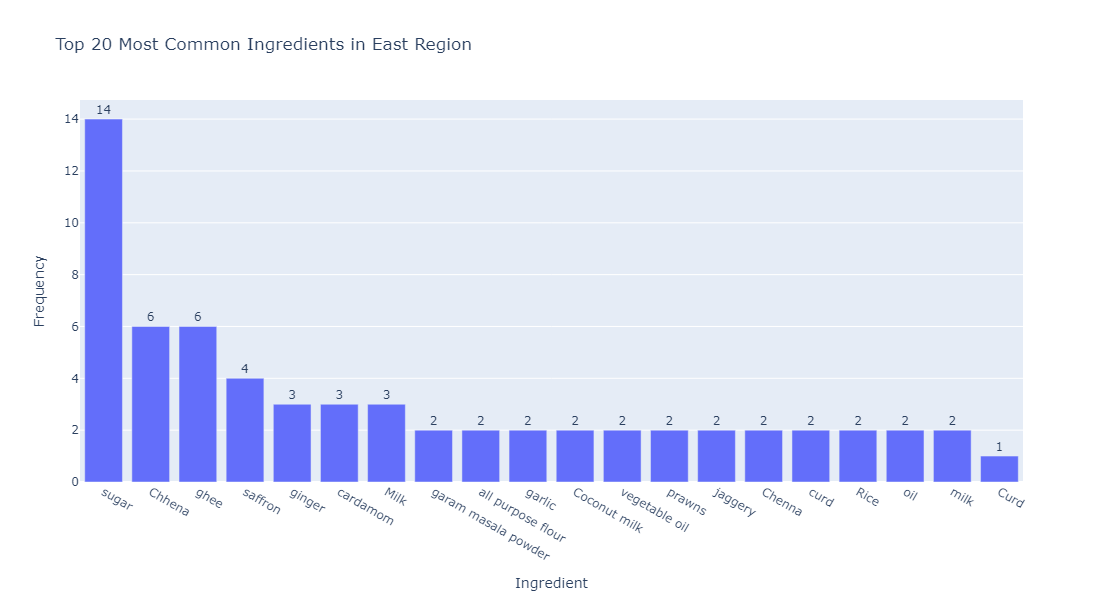

In [20]:
# Example: Analyze ingredients for the 'North' region
north_ingredients_freq = get_region_ingredients('East')

# Bar plot for ingredient frequency in the North region
fig_north_ingredients = px.bar(north_ingredients_freq.head(20), x='ingredient', y='frequency',
                               title='Top 20 Most Common Ingredients in East Region',
                               labels={'ingredient': 'Ingredient', 'frequency': 'Frequency'},
                               text='frequency')
fig_north_ingredients.update_traces(texttemplate='%{text}', textposition='outside')
fig_north_ingredients.update_layout(width=1000, height=600)
fig_north_ingredients.show()

## WEST

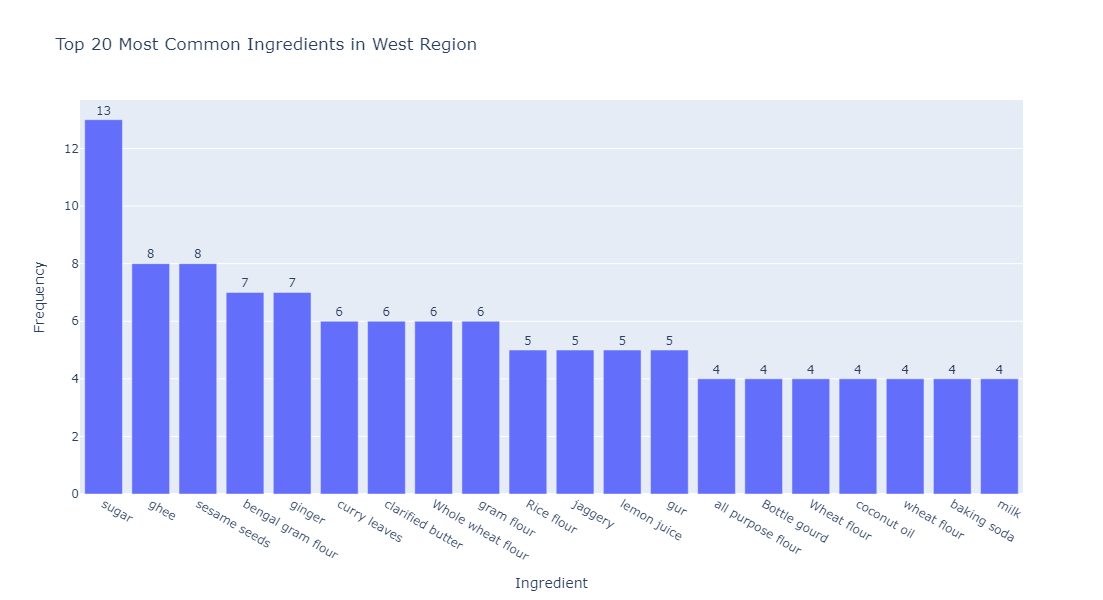

In [21]:
# Example: Analyze ingredients for the 'North' region
north_ingredients_freq = get_region_ingredients('West')

# Bar plot for ingredient frequency in the North region
fig_north_ingredients = px.bar(north_ingredients_freq.head(20), x='ingredient', y='frequency',
                               title='Top 20 Most Common Ingredients in West Region',
                               labels={'ingredient': 'Ingredient', 'frequency': 'Frequency'},
                               text='frequency')
fig_north_ingredients.update_traces(texttemplate='%{text}', textposition='outside')
fig_north_ingredients.update_layout(width=1000, height=600)
fig_north_ingredients.show()

## Flavor Profiles by Region


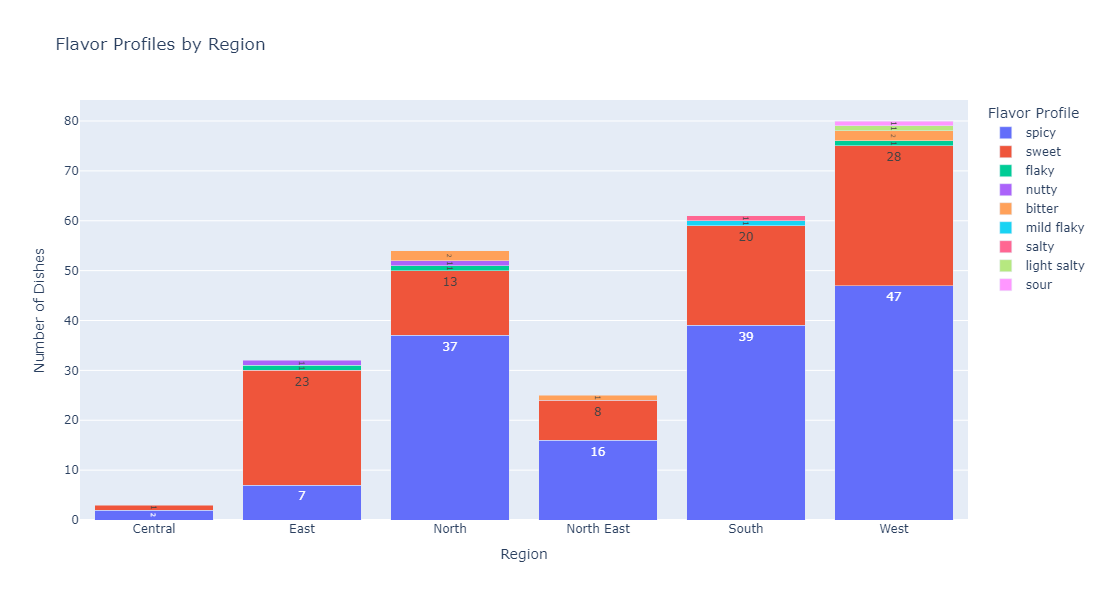

In [22]:
# Count the number of dishes for each flavor profile in each region
flavor_profile_region = df.groupby(['region', 'flavor_profile']).size().reset_index(name='count')

# Bar plot for flavor profiles by region
fig_flavor_profile_region = px.bar(flavor_profile_region, x='region', y='count', color='flavor_profile',
                                   title='Flavor Profiles by Region',
                                   labels={'region': 'Region', 'count': 'Number of Dishes', 'flavor_profile': 'Flavor Profile'},
                                   barmode='stack', text='count')
fig_flavor_profile_region.update_traces(texttemplate='%{text}', textposition='inside')
fig_flavor_profile_region.update_layout(width=1000, height=600)
fig_flavor_profile_region.show()

# 6. Course Analysis

## Course by Region

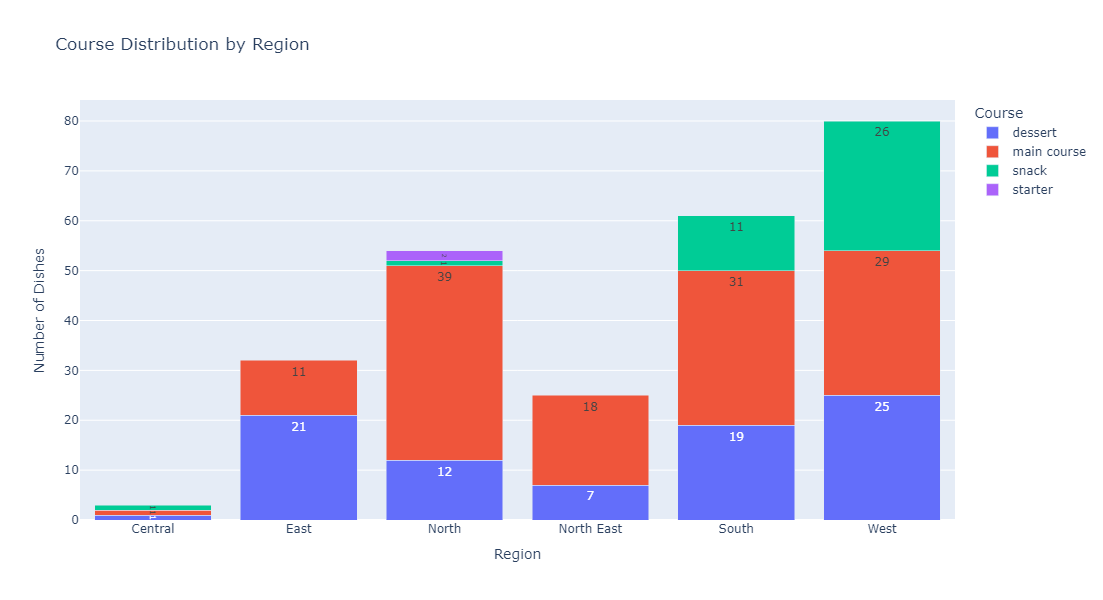

In [23]:

# Count the number of dishes for each course in each region
course_region_count = df.groupby(['region', 'course']).size().reset_index(name='count')

# Bar plot for course distribution by region
fig_course_region = px.bar(course_region_count, x='region', y='count', color='course',
                           title='Course Distribution by Region',
                           labels={'region': 'Region', 'count': 'Number of Dishes', 'course': 'Course'},
                           barmode='stack', text='count')
fig_course_region.update_traces(texttemplate='%{text}', textposition='inside')
fig_course_region.update_layout(width=1000, height=600)
fig_course_region.show()

## Prep and Cook Time by Course

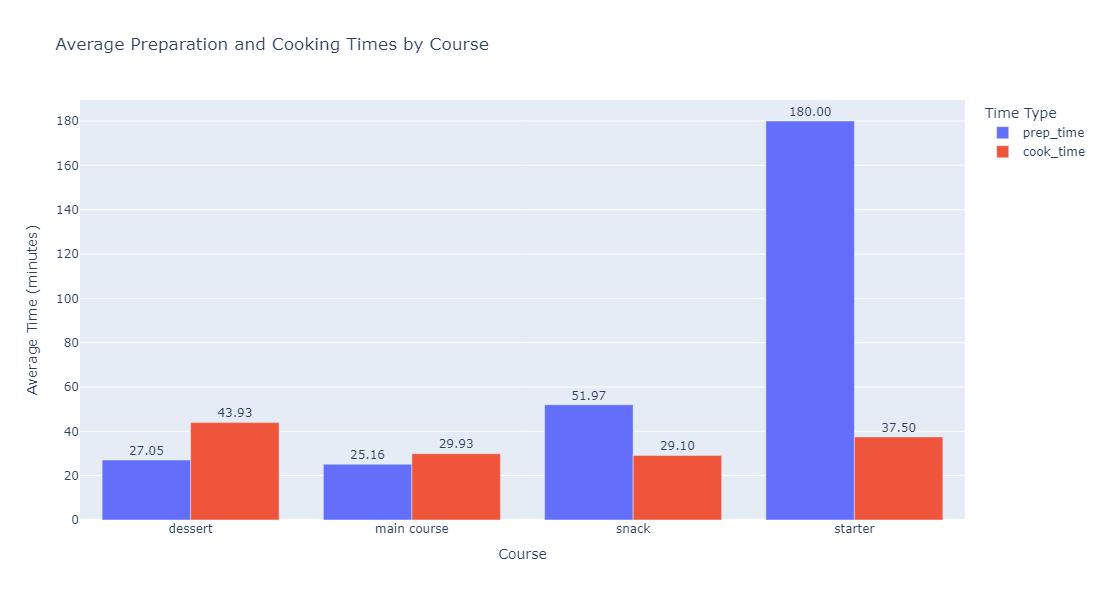

In [24]:
# Calculate the average preparation and cooking times for each course
prep_cook_time_course = df.groupby('course').agg({'prep_time': 'mean', 'cook_time': 'mean'}).reset_index()

# Melt the DataFrame to have a long format for easier plotting
prep_cook_time_melt = prep_cook_time_course.melt(id_vars='course', value_vars=['prep_time', 'cook_time'],
                                                 var_name='time_type', value_name='time')

# Bar plot for average preparation and cooking times by course
fig_prep_cook_time_course = px.bar(prep_cook_time_melt, x='course', y='time', color='time_type',
                                   title='Average Preparation and Cooking Times by Course',
                                   labels={'course': 'Course', 'time': 'Average Time (minutes)', 'time_type': 'Time Type'},
                                   barmode='group', text='time')
fig_prep_cook_time_course.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_prep_cook_time_course.update_layout(width=1000, height=600)
fig_prep_cook_time_course.show()


# 7. Diet Analysis

## Diet by Region Analysis

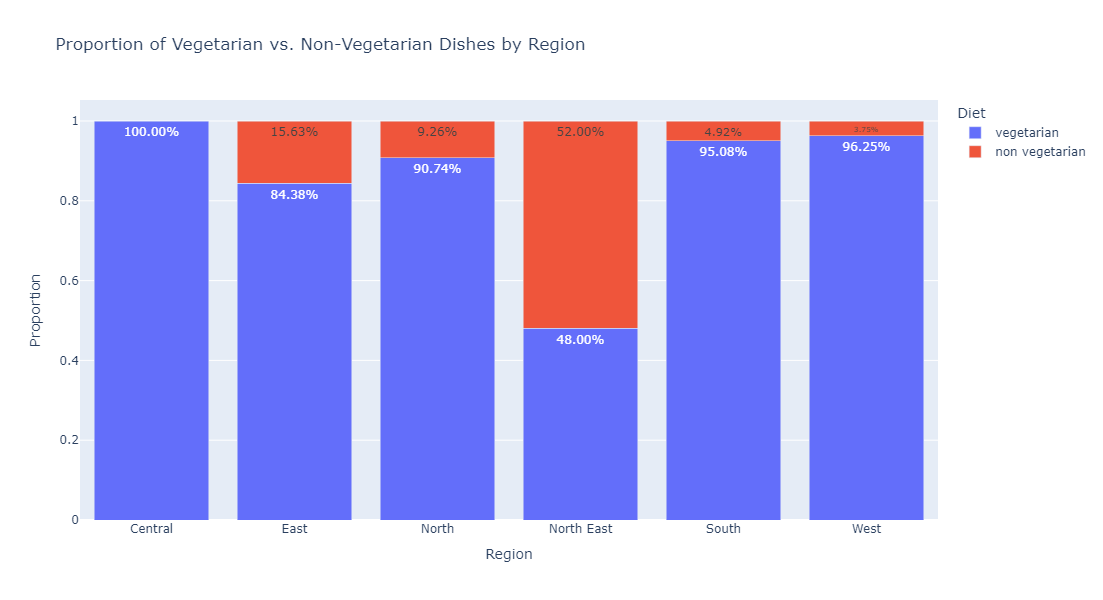

In [25]:

# Count the number of vegetarian and non-vegetarian dishes for each region
diet_region_count = df.groupby(['region', 'diet']).size().reset_index(name='count')

# Calculate the total number of dishes for each region
total_dishes_region = df['region'].value_counts().reset_index()
total_dishes_region.columns = ['region', 'total_count']

# Merge the counts with the total counts to calculate proportions
diet_region_count = diet_region_count.merge(total_dishes_region, on='region')
diet_region_count['proportion'] = diet_region_count['count'] / diet_region_count['total_count']

# Bar plot for diet distribution by region
fig_diet_region = px.bar(diet_region_count, x='region', y='proportion', color='diet',
                         title='Proportion of Vegetarian vs. Non-Vegetarian Dishes by Region',
                         labels={'region': 'Region', 'proportion': 'Proportion', 'diet': 'Diet'},
                         barmode='stack', text='proportion')
fig_diet_region.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig_diet_region.update_layout(width=1000, height=600)
fig_diet_region.show()

# 8. Correlation Analysis

## Time vs. Ingredients
### Analyze Correlation Between Number of Ingredients and Preparation or Cooking Time

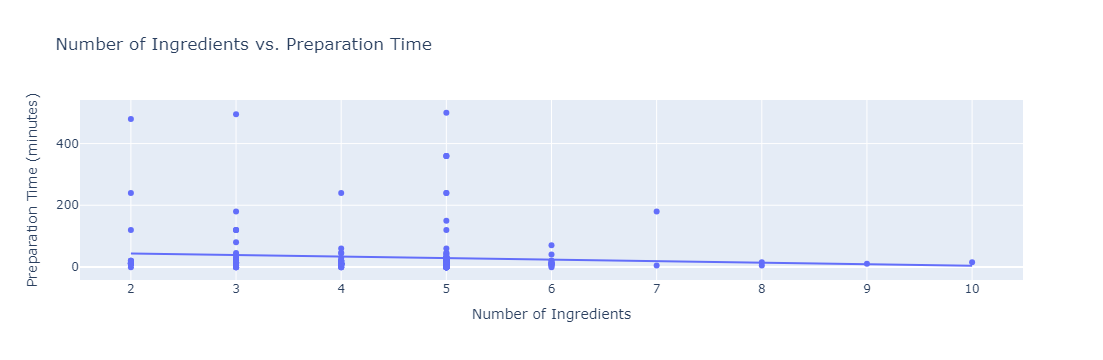

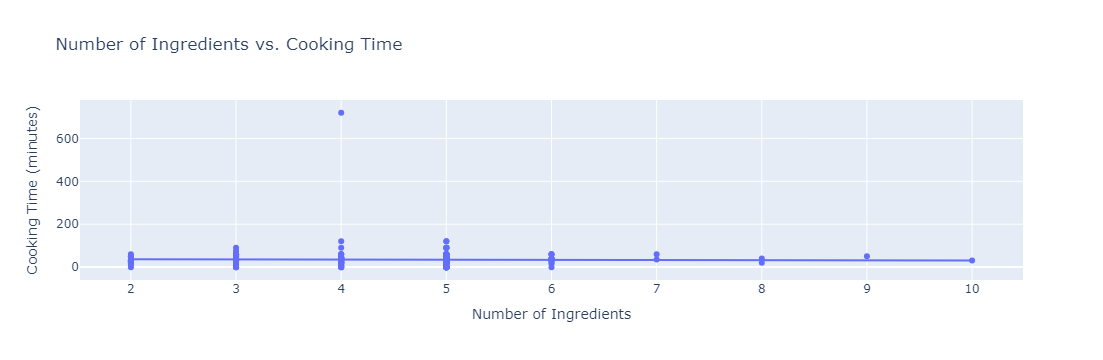

Correlation between number of ingredients and preparation time: -0.08273366293651388
Correlation between number of ingredients and cooking time: -0.016535517590279273


In [26]:
# Calculate the number of ingredients for each dish
df['num_ingredients'] = df['ingredients'].apply(lambda x: len(x.split(', ')))

# Scatter plot for number of ingredients vs. preparation time
fig_prep_time = px.scatter(df, x='num_ingredients', y='prep_time',
                           title='Number of Ingredients vs. Preparation Time',
                           labels={'num_ingredients': 'Number of Ingredients', 'prep_time': 'Preparation Time (minutes)'},
                           trendline='ols')

# Scatter plot for number of ingredients vs. cooking time
fig_cook_time = px.scatter(df, x='num_ingredients', y='cook_time',
                           title='Number of Ingredients vs. Cooking Time',
                           labels={'num_ingredients': 'Number of Ingredients', 'cook_time': 'Cooking Time (minutes)'},
                           trendline='ols')

fig_prep_time.show()
fig_cook_time.show()

# Correlation coefficients
prep_time_corr = df['num_ingredients'].corr(df['prep_time'])
cook_time_corr = df['num_ingredients'].corr(df['cook_time'])

print(f"Correlation between number of ingredients and preparation time: {prep_time_corr}")
print(f"Correlation between number of ingredients and cooking time: {cook_time_corr}")

## Flavor Profile vs. Ingredients
### Analyze Common Ingredients in Specific Flavor Profiles

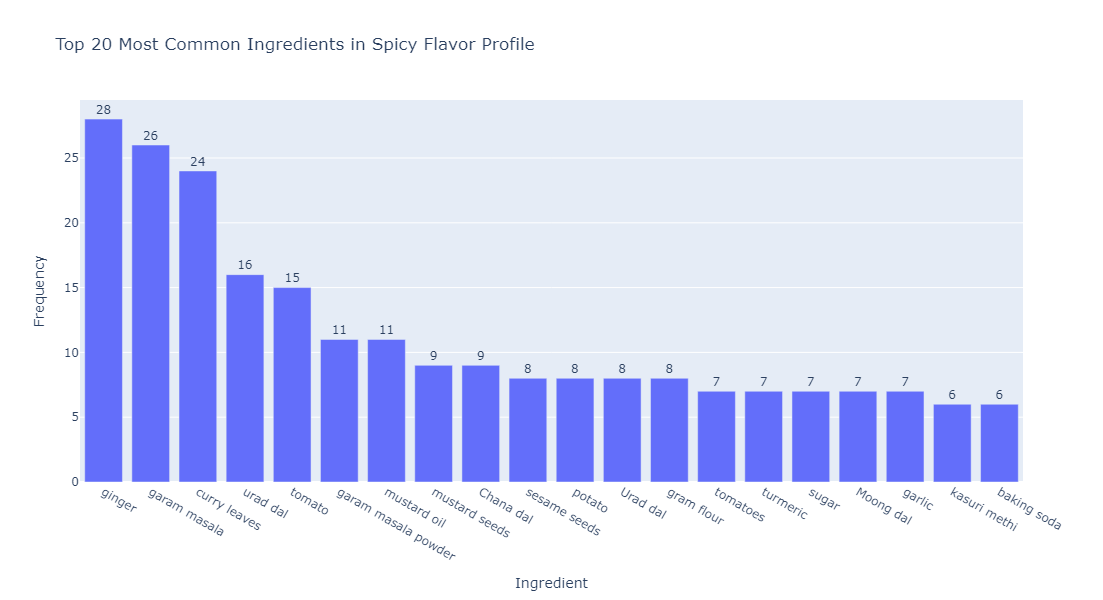

In [27]:

# Split the ingredients and count their frequencies for each flavor profile
def get_flavor_profile_ingredients(flavor_profile):
    flavor_df = df[df['flavor_profile'] == flavor_profile]
    ingredients_list = flavor_df['ingredients'].str.split(', ').sum()
    ingredients_count = Counter(ingredients_list)
    return pd.DataFrame(ingredients_count.items(), columns=['ingredient', 'frequency']).sort_values(by='frequency', ascending=False)

# Example: Analyze ingredients for the 'spicy' flavor profile
spicy_ingredients_freq = get_flavor_profile_ingredients('spicy')

# Bar plot for ingredient frequency in the spicy flavor profile
fig_spicy_ingredients = px.bar(spicy_ingredients_freq.head(20), x='ingredient', y='frequency',
                               title='Top 20 Most Common Ingredients in Spicy Flavor Profile',
                               labels={'ingredient': 'Ingredient', 'frequency': 'Frequency'},
                               text='frequency')
fig_spicy_ingredients.update_traces(texttemplate='%{text}', textposition='outside')
fig_spicy_ingredients.update_layout(width=1000, height=600)
fig_spicy_ingredients.show()

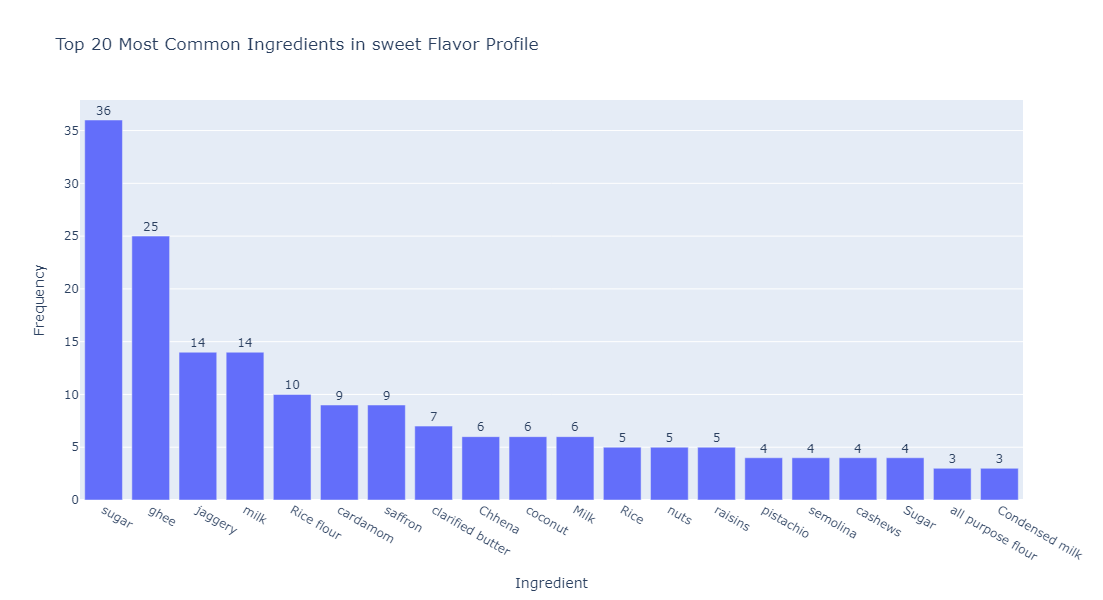

In [28]:
# Example: Analyze ingredients for the 'spicy' flavor profile
spicy_ingredients_freq = get_flavor_profile_ingredients('sweet')

# Bar plot for ingredient frequency in the spicy flavor profile
fig_spicy_ingredients = px.bar(spicy_ingredients_freq.head(20), x='ingredient', y='frequency',
                               title='Top 20 Most Common Ingredients in sweet Flavor Profile',
                               labels={'ingredient': 'Ingredient', 'frequency': 'Frequency'},
                               text='frequency')
fig_spicy_ingredients.update_traces(texttemplate='%{text}', textposition='outside')
fig_spicy_ingredients.update_layout(width=1000, height=600)
fig_spicy_ingredients.show()

# 9. Comparative Analysis

## State vs. Region
### Diversity of Dishes Across Different States and Regions

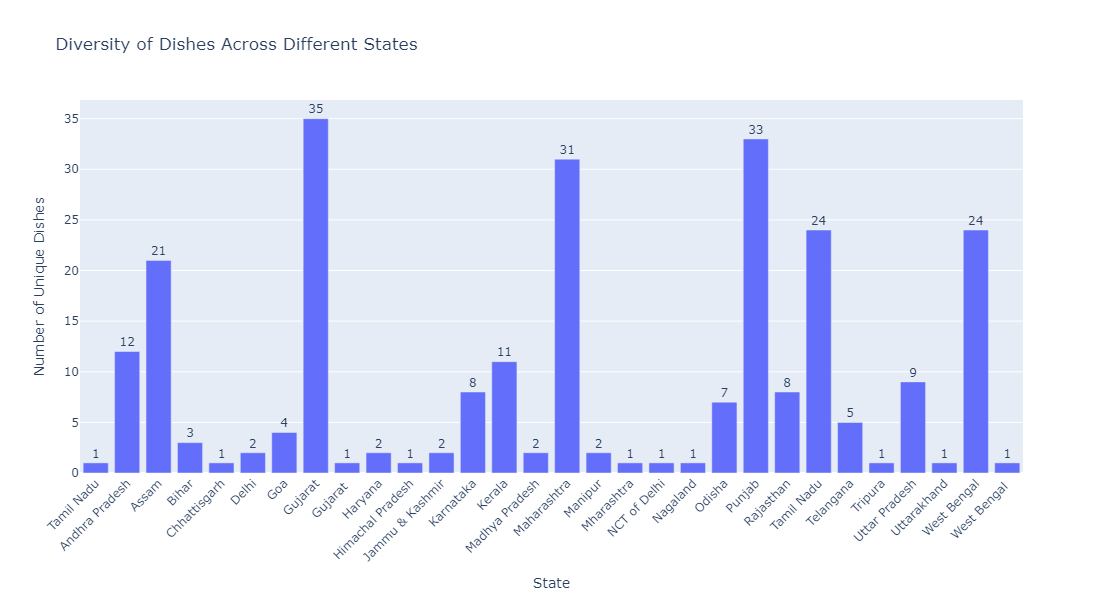

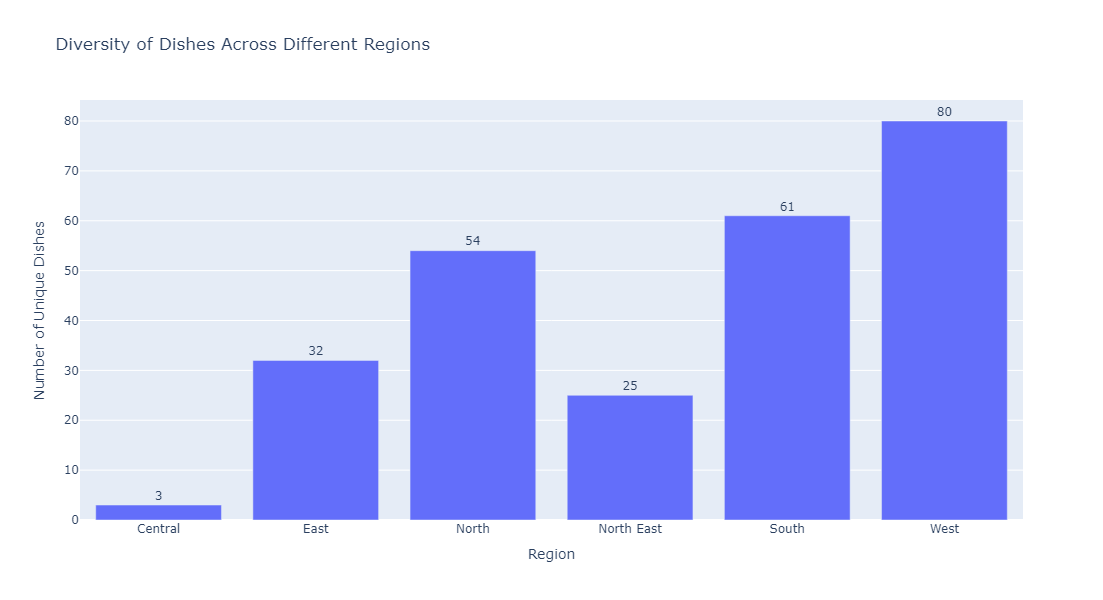

In [29]:
# Count the number of unique dishes for each state
state_diversity = df.groupby('state')['name'].nunique().reset_index().rename(columns={'name': 'num_dishes'})

# Count the number of unique dishes for each region
region_diversity = df.groupby('region')['name'].nunique().reset_index().rename(columns={'name': 'num_dishes'})

# Bar plot for dish diversity by state
fig_state_diversity = px.bar(state_diversity, x='state', y='num_dishes',
                             title='Diversity of Dishes Across Different States',
                             labels={'state': 'State', 'num_dishes': 'Number of Unique Dishes'},
                             text='num_dishes')
fig_state_diversity.update_traces(texttemplate='%{text}', textposition='outside')
fig_state_diversity.update_layout(width=1000, height=600, xaxis_tickangle=-45)
fig_state_diversity.show()

# Bar plot for dish diversity by region
fig_region_diversity = px.bar(region_diversity, x='region', y='num_dishes',
                              title='Diversity of Dishes Across Different Regions',
                              labels={'region': 'Region', 'num_dishes': 'Number of Unique Dishes'},
                              text='num_dishes')
fig_region_diversity.update_traces(texttemplate='%{text}', textposition='outside')
fig_region_diversity.update_layout(width=1000, height=600)
fig_region_diversity.show()

## Average Preparation and Cooking Times Across Different States and Regions

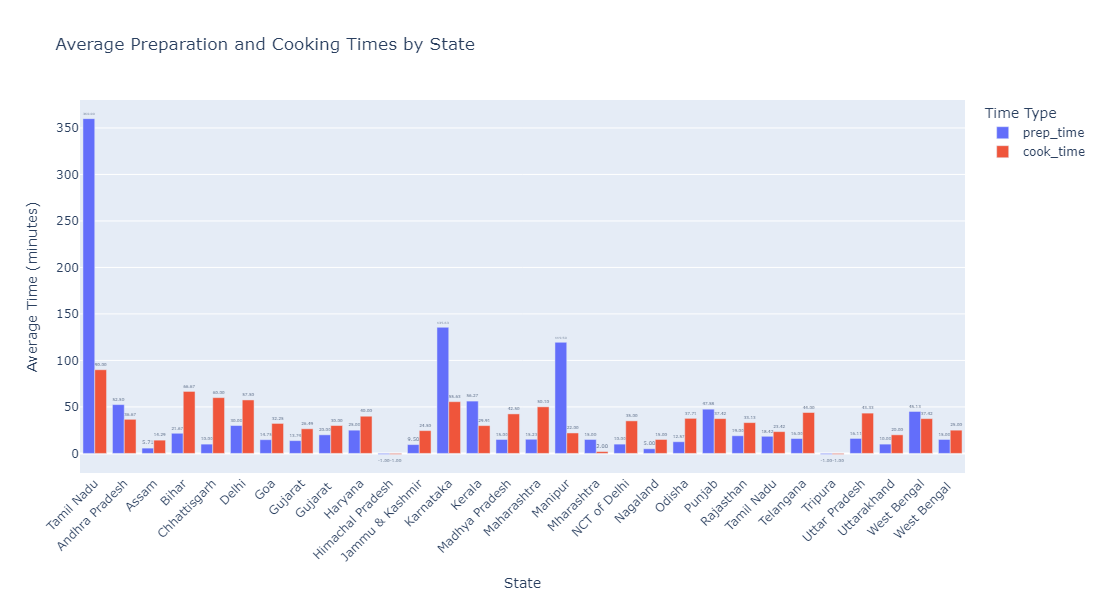

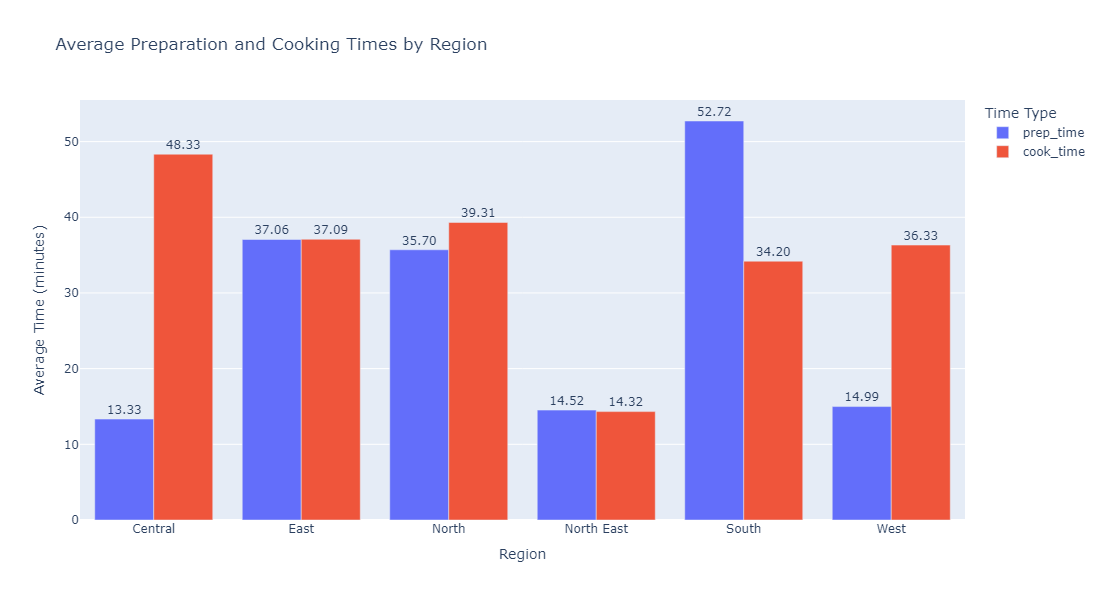

In [30]:
# Calculate the average preparation and cooking times for each state
state_time_efficiency = df.groupby('state').agg({'prep_time': 'mean', 'cook_time': 'mean'}).reset_index()

# Calculate the average preparation and cooking times for each region
region_time_efficiency = df.groupby('region').agg({'prep_time': 'mean', 'cook_time': 'mean'}).reset_index()

# Melt the DataFrame to have a long format for easier plotting
state_time_efficiency_melt = state_time_efficiency.melt(id_vars='state', value_vars=['prep_time', 'cook_time'],
                                                        var_name='time_type', value_name='time')
region_time_efficiency_melt = region_time_efficiency.melt(id_vars='region', value_vars=['prep_time', 'cook_time'],
                                                          var_name='time_type', value_name='time')

# Bar plot for average preparation and cooking times by state
fig_state_time_efficiency = px.bar(state_time_efficiency_melt, x='state', y='time', color='time_type',
                                   title='Average Preparation and Cooking Times by State',
                                   labels={'state': 'State', 'time': 'Average Time (minutes)', 'time_type': 'Time Type'},
                                   barmode='group', text='time')
fig_state_time_efficiency.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_state_time_efficiency.update_layout(width=1000, height=600, xaxis_tickangle=-45)
fig_state_time_efficiency.show()

# Bar plot for average preparation and cooking times by region
fig_region_time_efficiency = px.bar(region_time_efficiency_melt, x='region', y='time', color='time_type',
                                    title='Average Preparation and Cooking Times by Region',
                                    labels={'region': 'Region', 'time': 'Average Time (minutes)', 'time_type': 'Time Type'},
                                    barmode='group', text='time')
fig_region_time_efficiency.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_region_time_efficiency.update_layout(width=1000, height=600)
fig_region_time_efficiency.show()


# 10. Complexity Analysis

## Recipe Complexity Index

### A Complexity Index Based on Ingredients and Total Time

In [31]:
# Calculate complexity index: number of ingredients + total time (prep_time + cook_time)
df['complexity_index'] = df['ingredients'].apply(lambda x: len(x.split(', '))) + df['prep_time'] + df['cook_time']

# Average complexity index by state
state_complexity = df.groupby('state')['complexity_index'].mean().reset_index()

# Average complexity index by region
region_complexity = df.groupby('region')['complexity_index'].mean().reset_index()

print("Average Complexity Index by State:")
print(state_complexity.sort_values(by='complexity_index', ascending=False))

print("\nAverage Complexity Index by Region:")
print(region_complexity.sort_values(by='complexity_index', ascending=False))

Average Complexity Index by State:
               state  complexity_index
0         Tamil Nadu        455.000000
12         Karnataka        196.375000
16           Manipur        146.000000
3              Bihar         93.000000
1     Andhra Pradesh         92.666667
5              Delhi         92.500000
13            Kerala         90.363636
21            Punjab         89.909091
28       West Bengal         86.708333
4       Chhattisgarh         75.000000
9            Haryana         70.000000
15       Maharashtra         69.516129
26     Uttar Pradesh         64.444444
24         Telangana         63.200000
14    Madhya Pradesh         61.500000
22         Rajasthan         57.375000
8           Gujarat          56.000000
20            Odisha         53.428571
6                Goa         52.000000
18      NCT of Delhi         51.000000
23        Tamil Nadu         46.541667
7            Gujarat         44.657143
29      West Bengal          43.000000
11   Jammu & Kashmir         

### Flavor Profile and Complexity

In [32]:
# Average complexity index by flavor profile
flavor_complexity = df.groupby('flavor_profile')['complexity_index'].mean().reset_index()

print("\nAverage Complexity Index by Flavor Profile:")
print(flavor_complexity.sort_values(by='complexity_index', ascending=False))



Average Complexity Index by Flavor Profile:
  flavor_profile  complexity_index
3     mild flaky        153.000000
8          sweet         74.397849
7          spicy         69.162162
5          salty         59.000000
1          flaky         56.666667
0         bitter         53.000000
4          nutty         23.000000
6           sour         22.000000
2    light salty          3.000000


## Visualization For Each

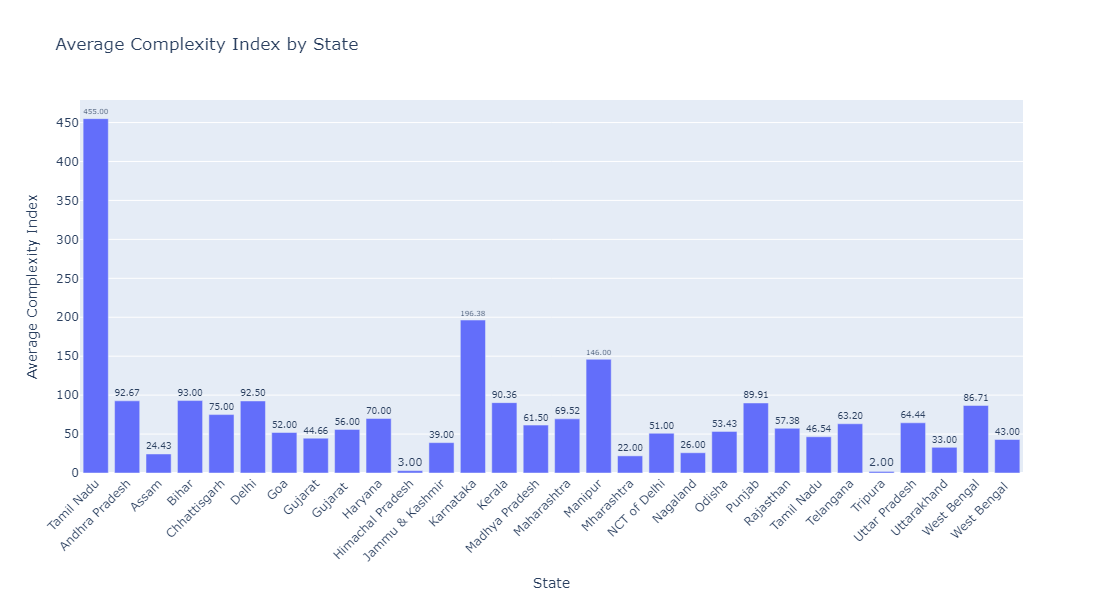

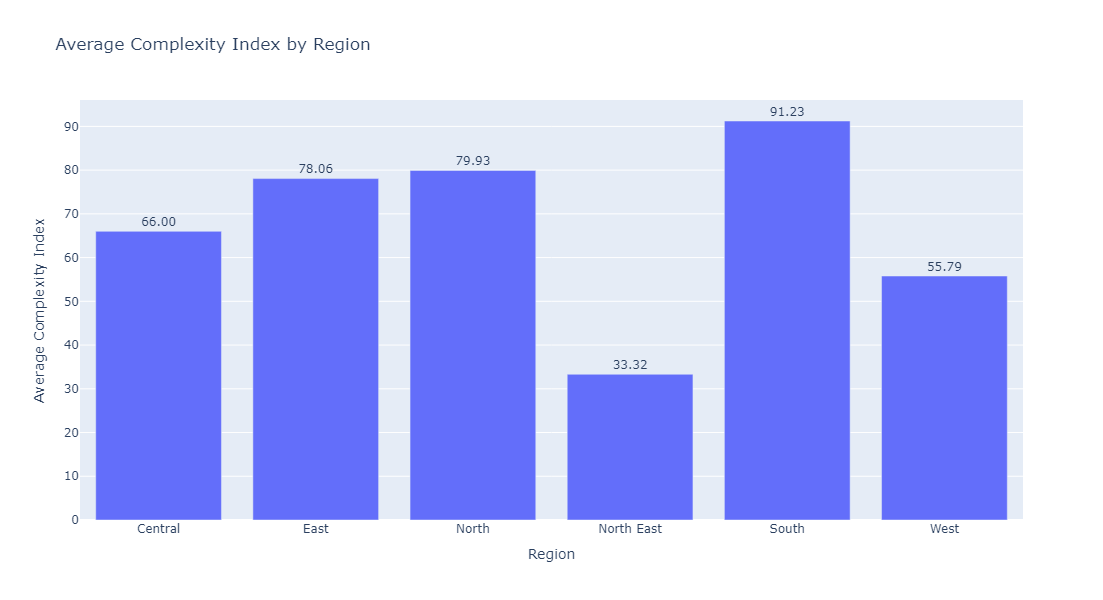

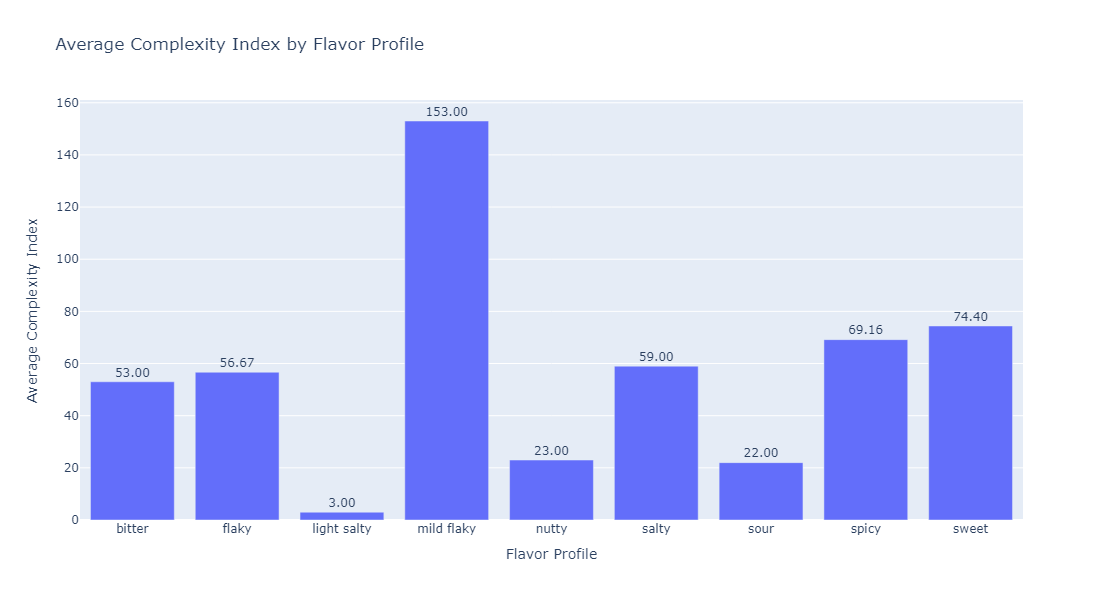

In [33]:

# Bar plot for average complexity index by state
fig_state_complexity = px.bar(state_complexity, x='state', y='complexity_index',
                              title='Average Complexity Index by State',
                              labels={'state': 'State', 'complexity_index': 'Average Complexity Index'})
fig_state_complexity.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig_state_complexity.update_layout(width=1000, height=600, xaxis_tickangle=-45)
fig_state_complexity.show()

# Bar plot for average complexity index by region
fig_region_complexity = px.bar(region_complexity, x='region', y='complexity_index',
                               title='Average Complexity Index by Region',
                               labels={'region': 'Region', 'complexity_index': 'Average Complexity Index'})
fig_region_complexity.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig_region_complexity.update_layout(width=800, height=600)
fig_region_complexity.show()

# Bar plot for average complexity index by flavor profile
fig_flavor_complexity = px.bar(flavor_complexity, x='flavor_profile', y='complexity_index',
                               title='Average Complexity Index by Flavor Profile',
                               labels={'flavor_profile': 'Flavor Profile', 'complexity_index': 'Average Complexity Index'})
fig_flavor_complexity.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig_flavor_complexity.update_layout(width=800, height=600)
fig_flavor_complexity.show()

# MUST TRY DISHES FROM EACH STATE IN EACH FLAVOUR PROFILE ON THE BASIS OF AVERAGE LONGEST COOKING + PREPRATION TIME....

In [34]:

# Step 1: Calculate average of cook time + prep time (total time)
df['total_time'] = (df['cook_time'] + df['prep_time']) / 2

# Step 2: Group by state and flavor profile
grouped = df.groupby(['state', 'flavor_profile'])

# Step 3: Find index of rows with maximum total time within each group
idx = grouped['total_time'].idxmax()

# Step 4: Select rows based on the indices found
selected_dishes = df.loc[idx].reset_index(drop=True)

# Step 5: Display results
for state, state_group in selected_dishes.groupby('state'):
    print(f"State: {state}")
    for flavor_profile, dishes in state_group.groupby('flavor_profile'):
        dish_names = ', '.join(dishes['name'])
        print(f"  Flavor Profile: {flavor_profile}, Dishes: {dish_names}")
    print()


State:  Tamil Nadu
  Flavor Profile: spicy, Dishes: Idli

State: Andhra Pradesh
  Flavor Profile: spicy, Dishes: Attu
  Flavor Profile: sweet, Dishes: Poornalu

State: Assam
  Flavor Profile: bitter, Dishes: Khar
  Flavor Profile: spicy, Dishes: Haq Maas
  Flavor Profile: sweet, Dishes: Lyangcha

State: Bihar
  Flavor Profile: spicy, Dishes: Litti chokha
  Flavor Profile: sweet, Dishes: Malapua

State: Chhattisgarh
  Flavor Profile: spicy, Dishes: Fara

State: Delhi
  Flavor Profile: spicy, Dishes: Rajma chaval
  Flavor Profile: sweet, Dishes: Kulfi falooda

State: Goa
  Flavor Profile: spicy, Dishes: Samosa
  Flavor Profile: sweet, Dishes: Bebinca

State: Gujarat
  Flavor Profile: bitter, Dishes: Methi na Gota
  Flavor Profile: light salty, Dishes: Farsi Puri
  Flavor Profile: sour, Dishes: Keri no ras
  Flavor Profile: spicy, Dishes: Undhiyu
  Flavor Profile: sweet, Dishes: Doodhpak

State: Gujarat 
  Flavor Profile: sweet, Dishes: Nankhatai

State: Haryana
  Flavor Profile: spicy, D

# 11. Recipe Similarity Analysis

## Similar Dishes: Text Analysis and Clustering


In [35]:

# Combine ingredients into a single string per recipe
df['ingredients_str'] = df['ingredients'].apply(lambda x: ', '.join(x.split(', ')))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the TF-IDF vectorizer on ingredients
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cluster recipes using KMeans
num_clusters = 11  # Example number of clusters
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# Assign cluster labels to each recipe
df['cluster'] = km.labels_

# Display cluster centers (optional)
print("Cluster Centers (Top Terms per Cluster):")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"Cluster {i}:", end='')
    for ind in order_centroids[i, :5]:
        print(f' {terms[ind]}', end= "")
    print()

Cluster Centers (Top Terms per Cluster):
Cluster 0: garam masala powder ginger cream
Cluster 1: rice coconut grated jaggery flour
Cluster 2: sesame seeds flour black rice
Cluster 3: oil mustard red green chillies
Cluster 4: ghee sugar flour semolina jaggery
Cluster 5: flour wheat butter gram clarified
Cluster 6: sugar cardamom chhena ghee milk
Cluster 7: tomato curry seeds garlic mustard
Cluster 8: milk sugar rice nuts rava
Cluster 9: dal chana peas green urad
Cluster 10: dal leaves curry urad chana


## Visualize Clusters

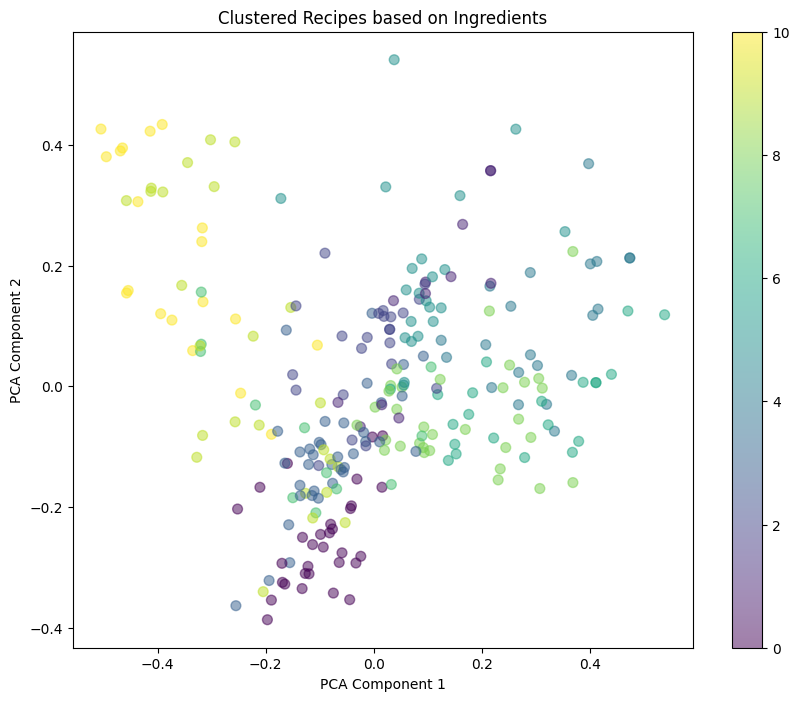

In [36]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(tfidf_matrix_pca[:, 0], tfidf_matrix_pca[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title('Clustered Recipes based on Ingredients')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

## Substitutions: Common Ingredient Substitutions in Similar Dishes


In [37]:
# Function to find common ingredient substitutions in each cluster
def find_substitutions(cluster_id):
    cluster_recipes = df[df['cluster'] == cluster_id]['ingredients_str']
    ingredient_lists = [ingredients.split(', ') for ingredients in cluster_recipes]
    ingredient_counter = Counter()
    for ingredients in ingredient_lists:
        for ingredient in ingredients:
            ingredient_counter[ingredient] += 1
    return ingredient_counter.most_common(5)  # Top 5 common substitutions

# Example: Find substitutions for Cluster 0
cluster_id = 0
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

# Example: Find substitutions for Cluster 1
cluster_id = 1
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

# Example: Find substitutions for Cluster 2
cluster_id = 2
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

# Example: Find substitutions for Cluster 3
cluster_id = 3
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

# Example: Find substitutions for Cluster 4
cluster_id = 4
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

# Example: Find substitutions for Cluster 5
cluster_id = 5
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

# Example: Find substitutions for Cluster 6
cluster_id = 6
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

# Example: Find substitutions for Cluster 7
cluster_id = 7
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

# Example: Find substitutions for Cluster 8
cluster_id = 8
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

cluster_id = 9
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")

cluster_id = 10
substitutions = find_substitutions(cluster_id)
print(f"\nCommon Ingredient Substitutions in Cluster {cluster_id}:")
for ingredient, count in substitutions:
    print(f"- {ingredient}: {count}")


Common Ingredient Substitutions in Cluster 0:
- garam masala: 20
- ginger: 8
- garam masala powder: 8
- kasuri methi: 5
- cashew nuts: 5

Common Ingredient Substitutions in Cluster 1:
- grated coconut: 6
- jaggery: 5
- coconut: 4
- Rice flour: 4
- raw rice: 2

Common Ingredient Substitutions in Cluster 2:
- sesame seeds: 7
- gur: 4
- gram flour: 4
- lemon juice: 3
- Rice flour: 3

Common Ingredient Substitutions in Cluster 3:
- ginger: 8
- mustard oil: 8
- jaggery: 3
- chillies: 3
- salt: 3

Common Ingredient Substitutions in Cluster 4:
- ghee: 18
- sugar: 10
- jaggery: 6
- Rice flour: 4
- semolina: 4

Common Ingredient Substitutions in Cluster 5:
- Wheat flour: 7
- Whole wheat flour: 7
- wheat flour: 4
- clarified butter: 4
- Rice flour: 3

Common Ingredient Substitutions in Cluster 6:
- sugar: 16
- cardamom: 8
- ghee: 6
- saffron: 6
- Chhena: 6

Common Ingredient Substitutions in Cluster 7:
- tomato: 8
- curry leaves: 4
- ginger: 3
- garlic: 3
- mustard seeds: 3

Common Ingredient S

# SUMMARY FOR POINT NO.11 (Recipe Similarity Analysis)

## The analysis looks at Indian recipes to see which ingredients are used together often. It groups recipes based on these ingredients using a method called TF-IDF and KMeans. This helps us find out what ingredients are popular across different types of Indian dishes. Using a scatter plot, we can visualize these groups of similar recipes. It also shows us which ingredients can be substitute for each other in similar recipes. Overall, this helps us understand the main ingredients and variations in Indian cooking, which is useful for learning about and creating recipes.

# **THANK YOU** 

## *I HOPE YOU LIKE IT AND YOU HAVE GAINED THE VALUEABLE INSIGHTS ABOUT THE INDIAN CUISINE*.......